# <span style="font-family:cursive;text-align:center">⬇️ Import Libraries</span>


In [ ]:
## EDA libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import dabl
import warnings
warnings.filterwarnings('ignore')

# <span style="font-family:cursive;text-align:center">⬇️ Import Data and ⚙️ Preprocessing</span>

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
According to data dictionary, we have 3 unknown fields, <b>fruitset, fruitmass, seeds</b> having high correlation values with the target varialble, the <b>yield</b> value.

1. we have a data dictionary of mutual correlated values of each of the fields with yield values
2. as this clearly is a regression problem, we can perform feature selection on the data
3. there are the following approaches:
    * f_regression() parameter for selecting by correlation
    * mutual_info_regression() for selecting by information gain
    * raw data features kept intact
4. Individual genetically unique blueberry plants are referred to as clones

In [ ]:
data=pd.read_csv("WildBlueberryPollinationSimulationData.csv")
data.head(10)

In [ ]:
data.shape

(777, 18)

In [ ]:
data.drop('Row#', axis='columns', inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   clonesize             777 non-null    float64
 1   honeybee              777 non-null    float64
 2   bumbles               777 non-null    float64
 3   andrena               777 non-null    float64
 4   osmia                 777 non-null    float64
 5   MaxOfUpperTRange      777 non-null    float64
 6   MinOfUpperTRange      777 non-null    float64
 7   AverageOfUpperTRange  777 non-null    float64
 8   MaxOfLowerTRange      777 non-null    float64
 9   MinOfLowerTRange      777 non-null    float64
 10  AverageOfLowerTRange  777 non-null    float64
 11  RainingDays           777 non-null    float64
 12  AverageRainingDays    777 non-null    float64
 13  fruitset              777 non-null    float64
 14  fruitmass             777 non-null    float64
 15  seeds                 7

In [ ]:
data.shape

(777, 17)

In [ ]:

# Checking the missing values
data.isnull().sum()

clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
yield                   0
dtype: int64

In [ ]:
#check for duplicated values
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
772    False
773    False
774    False
775    False
776    False
Length: 777, dtype: bool

In [ ]:

data.duplicated().sum()

0

In [ ]:

data.describe(include="all")

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000
mean,18.767696,0.417133,0.282389,0.468817,0.562062,82.277091,49.700515,68.723037,59.309395,28.690219,48.613127,18.309292,0.320000,0.502121,0.445983,36.122432,6012.849165
std,6.999063,0.978904,0.066343,0.161052,0.169119,9.193745,5.595769,7.676984,6.647760,3.209547,5.417072,12.124226,0.171279,0.079445,0.040333,4.377889,1356.955318
min,10.000000,0.000000,0.000000,0.000000,0.000000,69.700000,39.000000,58.200000,50.200000,24.300000,41.200000,1.000000,0.060000,0.192732,0.311921,22.079199,1637.704022
25%,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,3.770000,0.100000,0.454725,0.416281,33.116091,5124.854901
50%,12.500000,0.250000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.508297,0.445587,36.166044,6107.382466
75%,25.000000,0.500000,0.380000,0.630000,0.750000,89.000000,52.000000,71.900000,66.000000,30.000000,50.800000,24.000000,0.390000,0.561297,0.476149,39.239668,7022.189731
max,40.000000,18.430000,0.585000,0.750000,0.750000,94.600000,57.200000,79.000000,68.200000,33.000000,55.900000,34.000000,0.560000,0.652144,0.535660,46.585105,8969.401842


# <span style="font-family:cursive;text-align:center">📈 Univariate Analysis</span>

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">

 We have no null values, and overall dtype of the dataset is <b>float</b> So the next step will be Preprocessing </p>

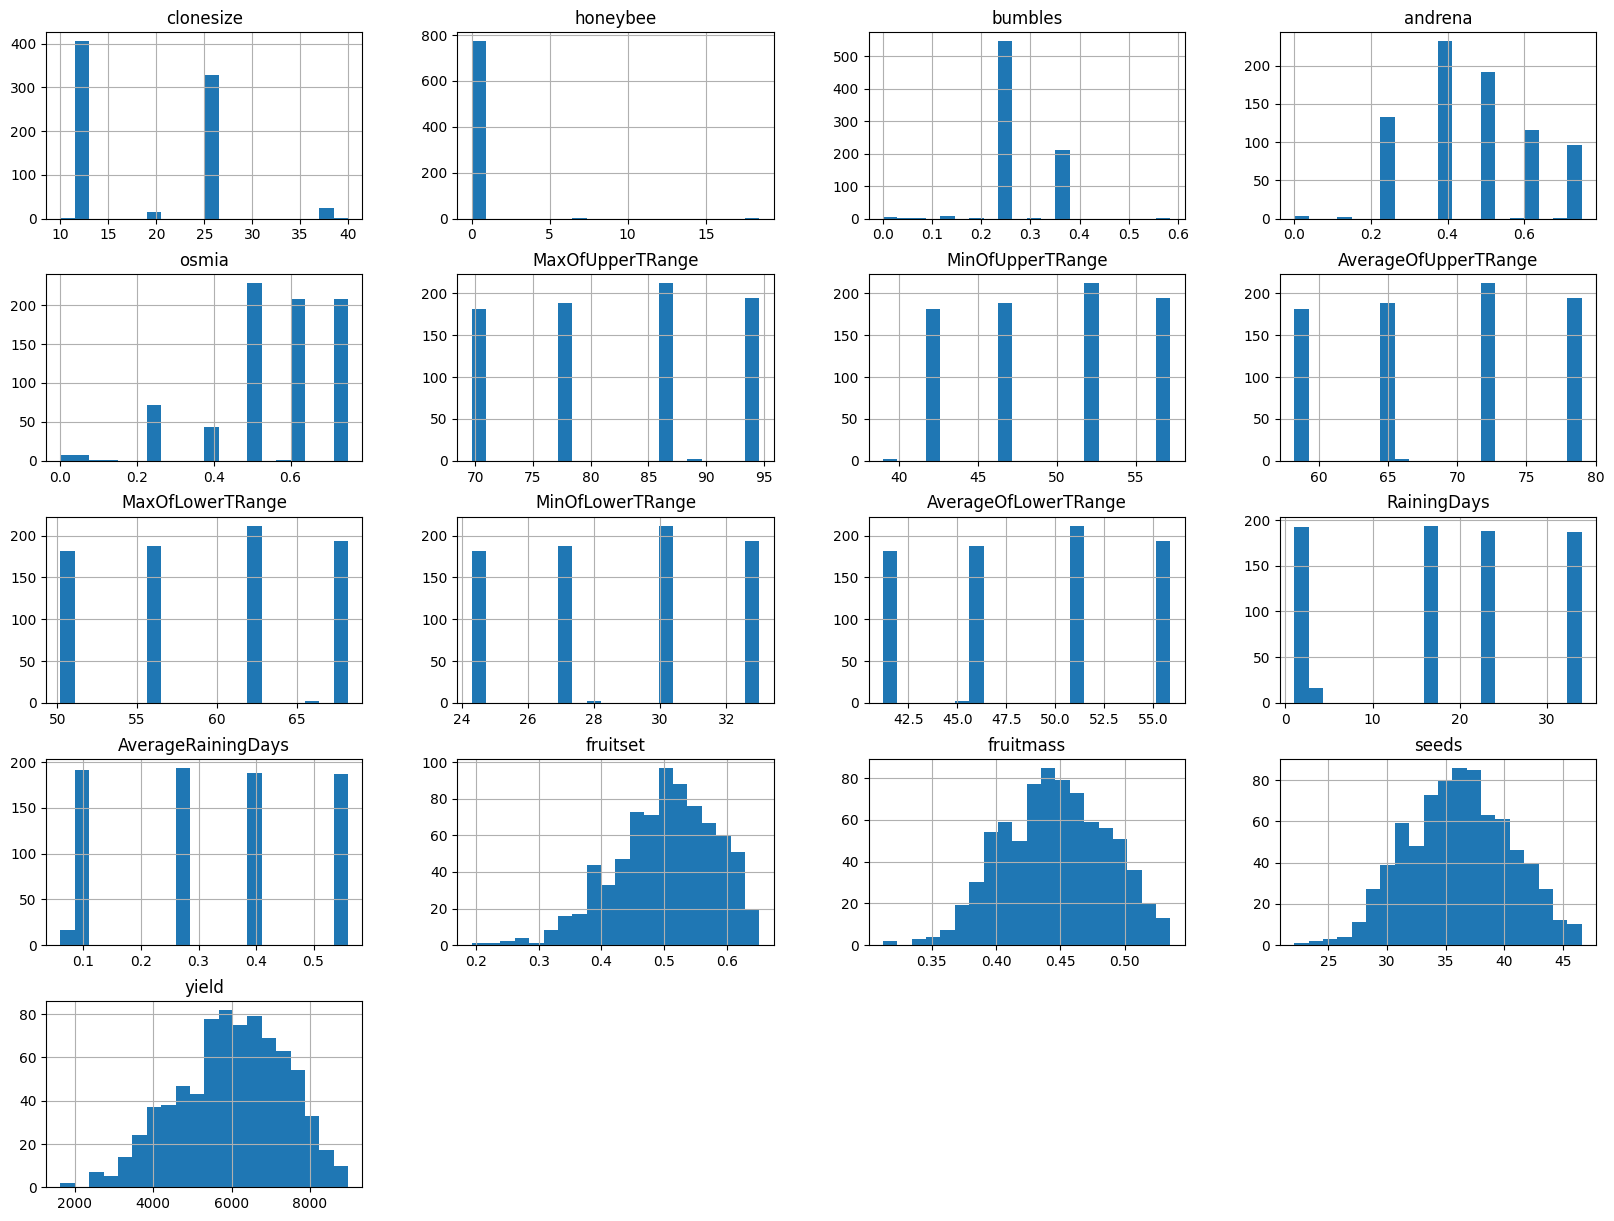

In [ ]:
data.hist(layout=(5,4), figsize=(20,15), bins=20)
plt.show()

Target looks like regression


[<Axes: title={'center': 'Target distribution'}, xlabel='yield', ylabel='frequency'>,
 array([[<Axes: title={'center': 'F=9.82E-01'}, xlabel='fruitset', ylabel='yield'>,
         <Axes: title={'center': 'F=-5.75E-01'}, xlabel='RainingDays (jittered)'>,
         <Axes: title={'center': 'F=-4.98E-01'}, xlabel='clonesize (jittered)'>,
         <Axes: title={'center': 'F=-3.41E-01'}, xlabel='honeybee (jittered)'>],
        [<Axes: title={'center': 'F=3.15E-01'}, xlabel='osmia (jittered)', ylabel='yield'>,
         <Axes: title={'center': 'F=2.86E-01'}, xlabel='bumbles (jittered)'>,
         <Axes: title={'center': 'F=-1.61E-01'}, xlabel='MaxOfLowerTRange (jittered)'>,
         <Axes: title={'center': 'F=1.23E-01'}, xlabel='andrena (jittered)'>]],
       dtype=object),
 None]

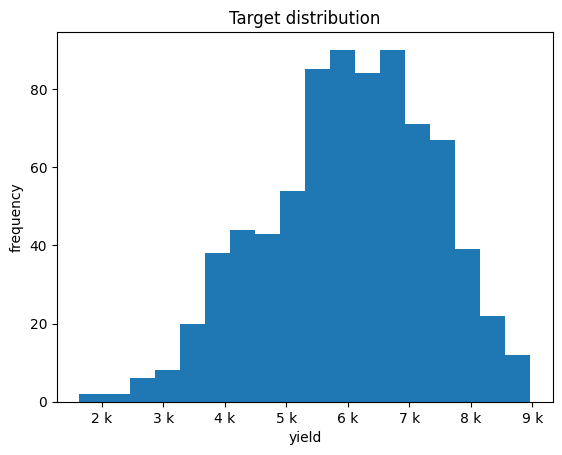

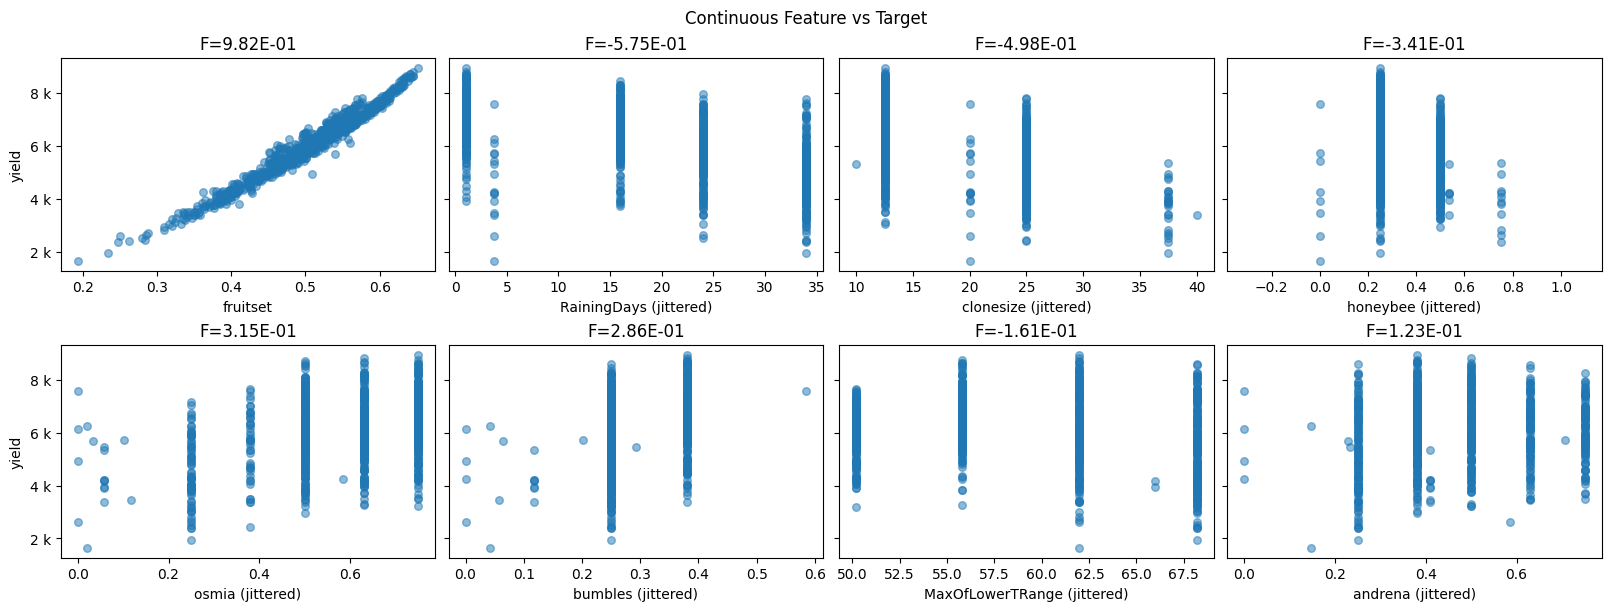

In [ ]:
#EDA using dabl
dabl.plot(data, target_col="yield")

<Axes: ylabel='bumbles'>

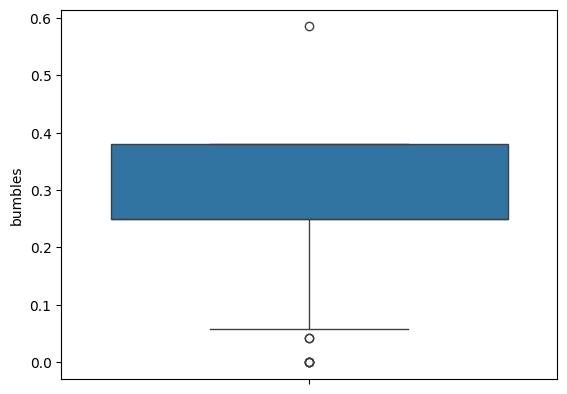

In [ ]:
sns.boxplot(data["bumbles"])

<Axes: ylabel='honeybee'>

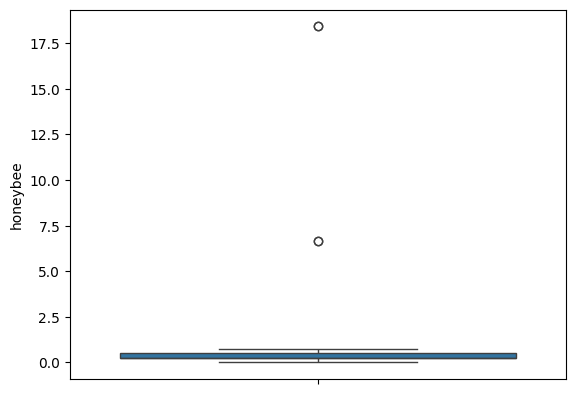

In [ ]:
sns.boxplot(data["honeybee"])

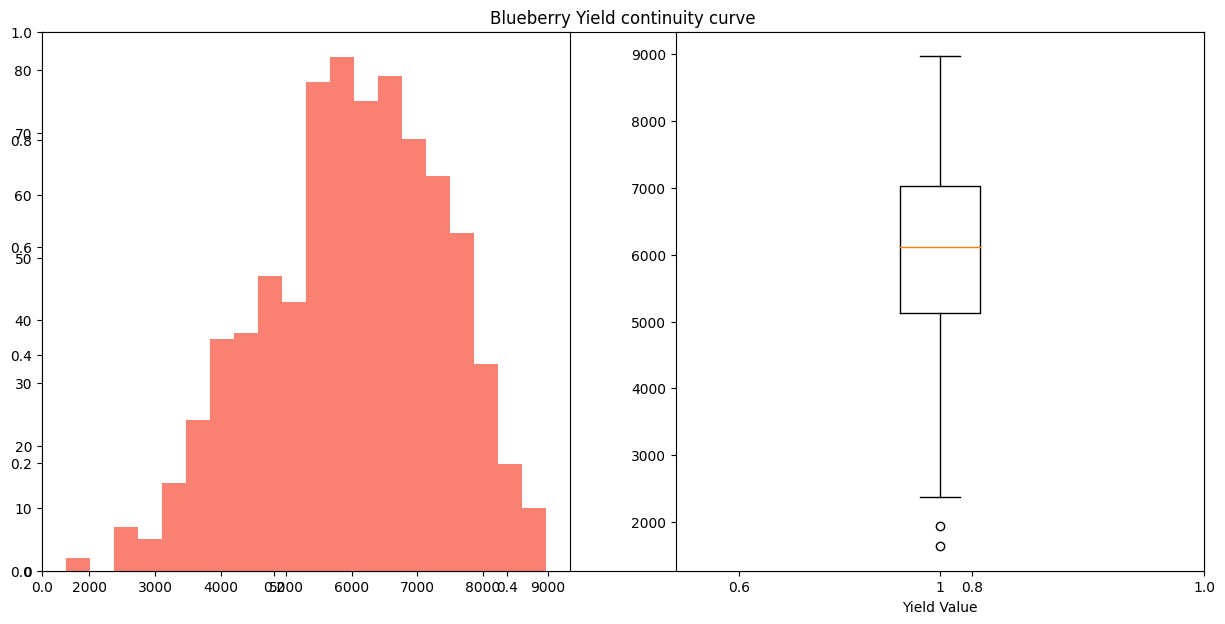

In [ ]:
figs = plt.figure(figsize=(15,7))
plt.title("Blueberry Yield continuity curve")
ax1 = figs.add_subplot(121)
ax2 = figs.add_subplot(122)
x = data["yield"]
plt.xlabel("Yield Value")
ax1.hist(x, bins=20, color="salmon")
ax2.boxplot(x);

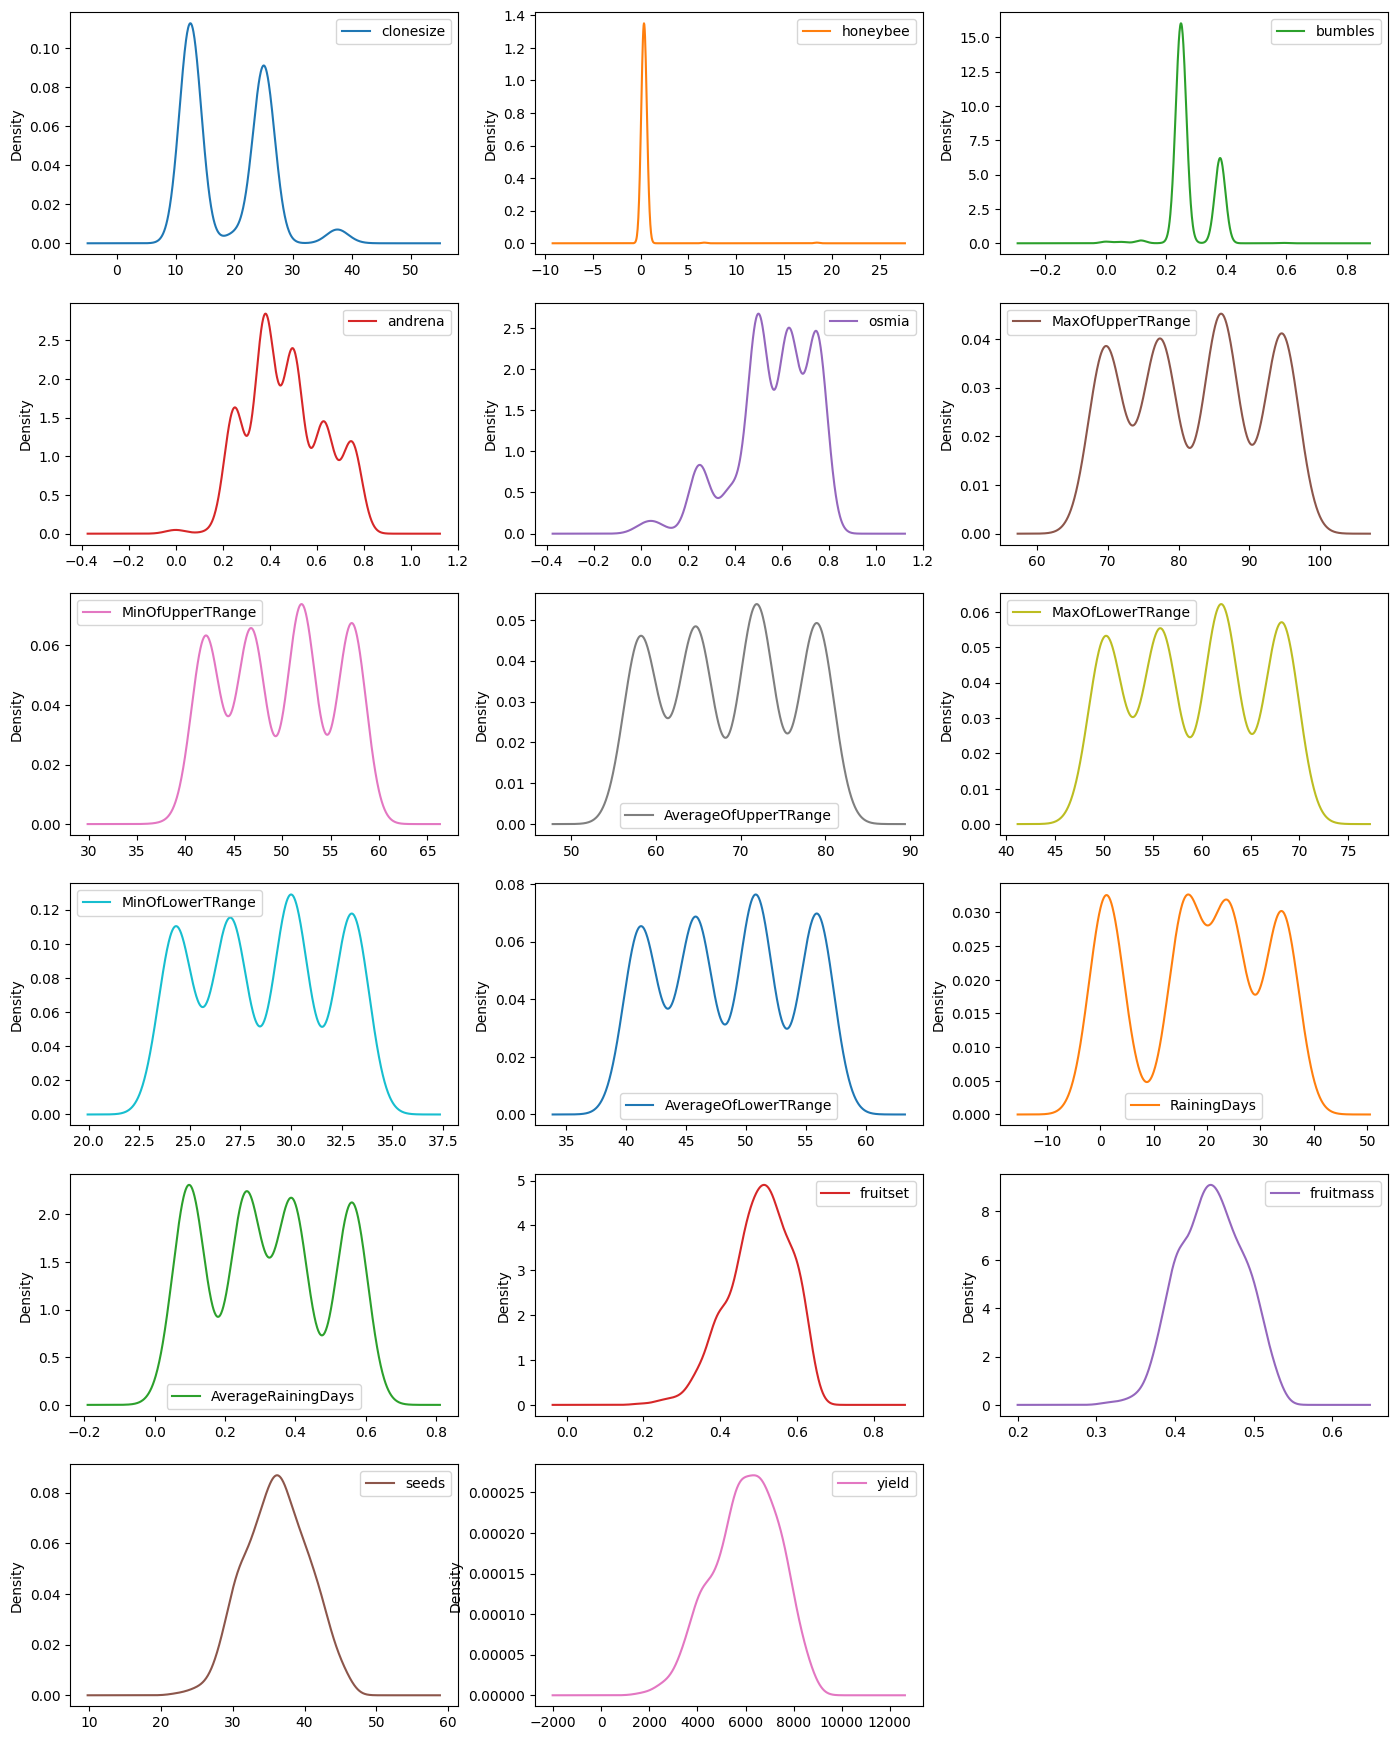

In [ ]:
# unpivot = pd.melt(berry_data, berry_data.describe().columns[-1], berry_data.describe().columns[:-1])
# g = sns.FacetGrid(unpivot, col="variable", col_wrap=3, sharex=False, sharey=False)
# g.map(sns.kdeplot, "value")
# plt.show()

# ===================================================================================

# new method (one-liner)

data.plot(kind="density",
                subplots=True,
                layout = (6,3),
                figsize=(17,22),
                sharex=False,
                sharey=False);

# kind = density, histogram, boxplots

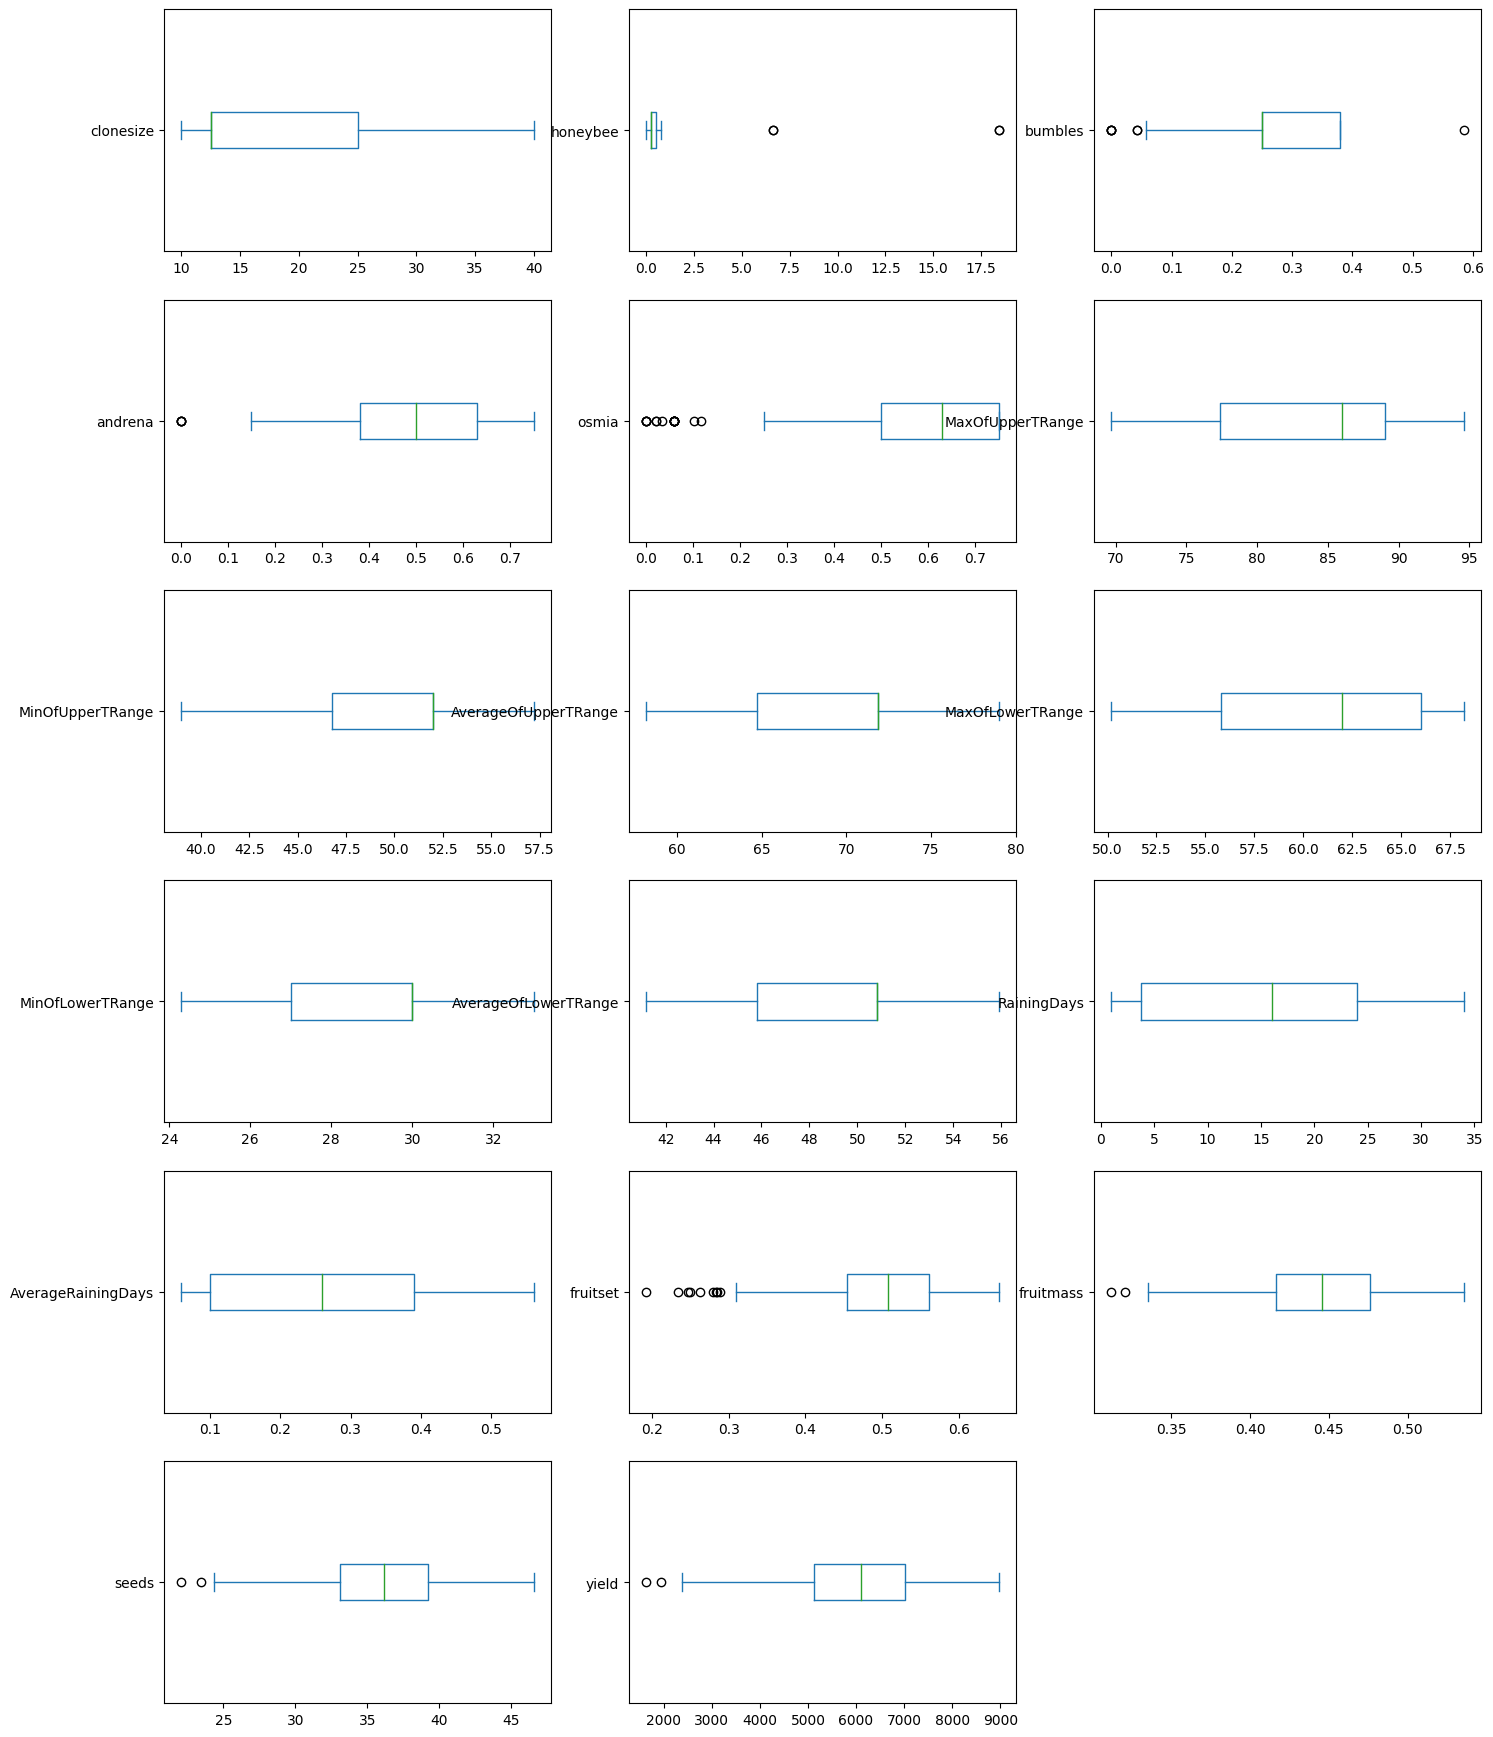

In [ ]:
data.plot(kind="box",
                vert=False, # makes horizontal plots instead of vertical
                subplots=True,
                layout = (6,3),
                figsize=(17,22),
                sharex=False,
                sharey=False);

# <span style="font-family:cursive;text-align:center">📊 Multivariate Analysis</span>

<Axes: >

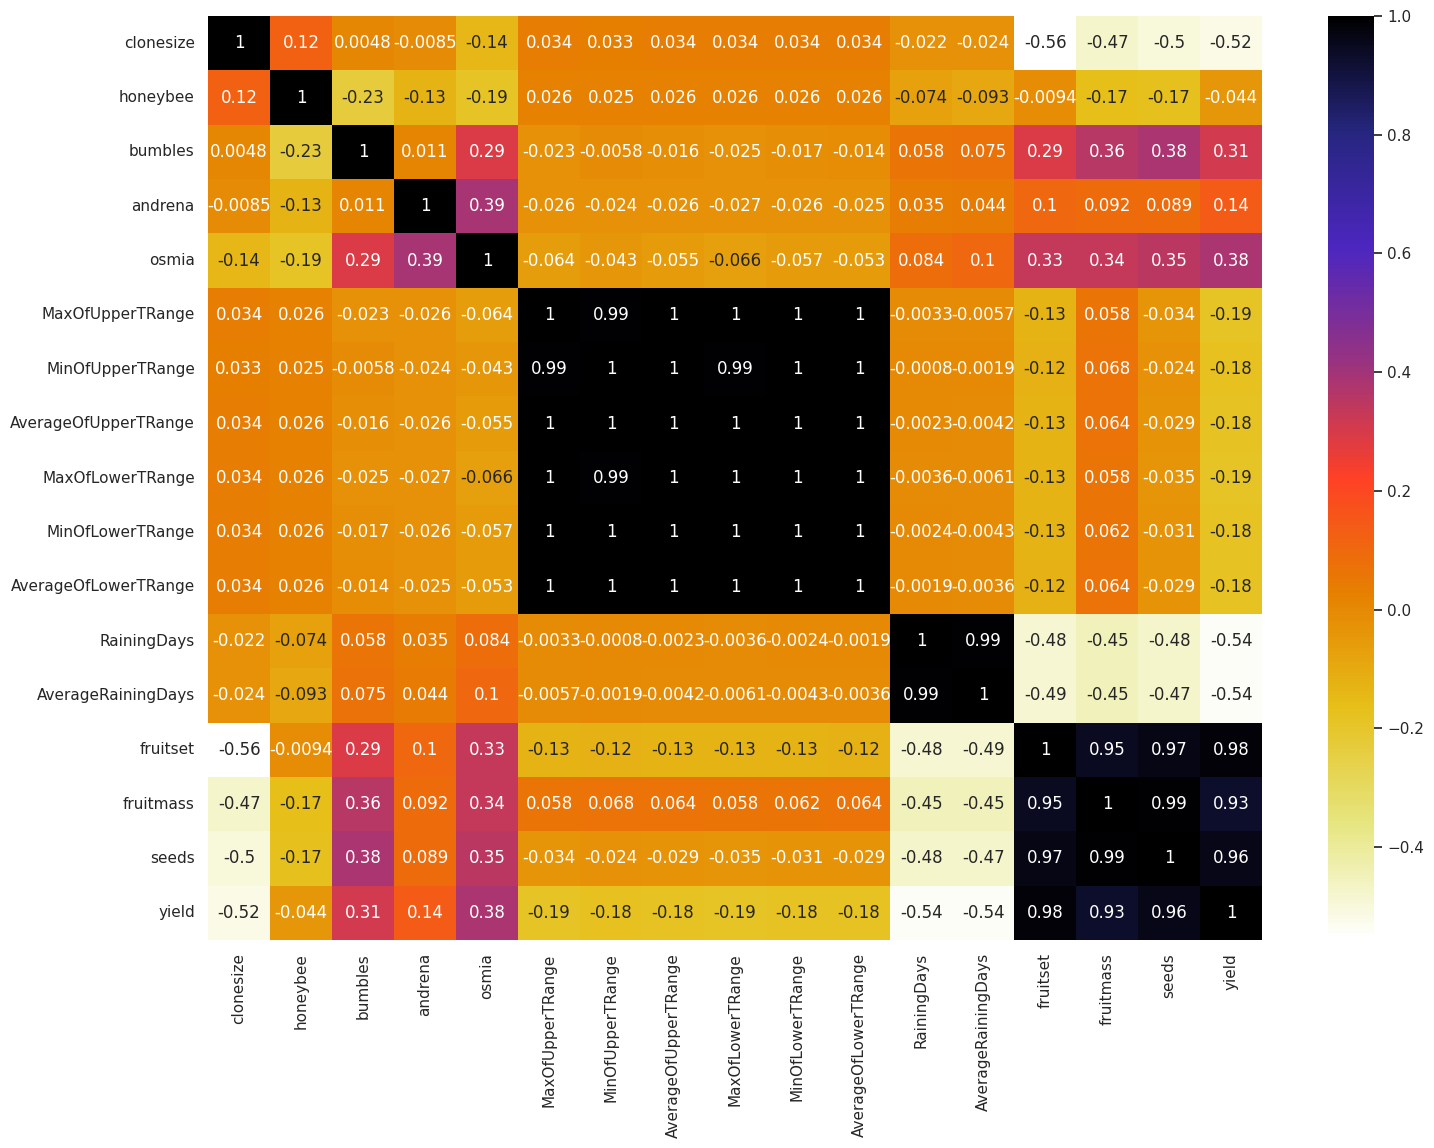

In [ ]:
plt.figure(figsize=(17,12))
sns.set()
sns.heatmap(data.corr(), annot=True, cmap=plt.cm.CMRmap_r)

# <span style="font-family:cursive;text-align:center">⚙️ Preprocessing</span>

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
  
columns to drop: 'MaxOfUpperTRange', 'MinOfUpperTRange', 'MaxOfLowerTRange', 'MinOfLowerTRange', 'RainingDays', 'honeybee'

We cannot keep fruitmass, fruitset and seeds as well. they are the derivatives of the output and cannot be considered for training.

In [ ]:
data.columns

Index(['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds',
       'yield'],
      dtype='object')

In [ ]:
bbry_data_process = data.drop(columns=[ 'MaxOfUpperTRange', 'MinOfUpperTRange', 'MaxOfLowerTRange', 'MinOfLowerTRange', 'RainingDays', 'honeybee', "fruitset", "fruitmass", "seeds"])
bbry_data_process

,clonesize,bumbles,andrena,osmia,AverageOfUpperTRange,AverageOfLowerTRange,AverageRainingDays,yield
0,37.5,0.250,0.250,0.250,71.9,50.8,0.26,3813.165795
1,37.5,0.250,0.250,0.250,71.9,50.8,0.10,4947.605663
2,37.5,0.250,0.250,0.250,79.0,55.9,0.26,3866.798965
3,37.5,0.250,0.250,0.250,79.0,55.9,0.10,4303.943030
4,37.5,0.250,0.250,0.250,71.9,50.8,0.39,3436.493543
...,...,...,...,...,...,...,...,...
772,10.0,0.117,0.409,0.058,71.9,50.8,0.06,5333.873335
773,40.0,0.117,0.409,0.058,71.9,50.8,0.06,3373.436842
774,20.0,0.117,0.409,0.058,71.9,50.8,0.39,4203.027624
775,20.0,0.117,0.409,0.058,65.6,45.3,0.06,4166.299735


In [ ]:
part1 = bbry_data_process.drop(columns=['yield'])
part2 = bbry_data_process[['yield']]
part1

,clonesize,bumbles,andrena,osmia,AverageOfUpperTRange,AverageOfLowerTRange,AverageRainingDays
0,37.5,0.250,0.250,0.250,71.9,50.8,0.26
1,37.5,0.250,0.250,0.250,71.9,50.8,0.10
2,37.5,0.250,0.250,0.250,79.0,55.9,0.26
3,37.5,0.250,0.250,0.250,79.0,55.9,0.10
4,37.5,0.250,0.250,0.250,71.9,50.8,0.39
...,...,...,...,...,...,...,...
772,10.0,0.117,0.409,0.058,71.9,50.8,0.06
773,40.0,0.117,0.409,0.058,71.9,50.8,0.06
774,20.0,0.117,0.409,0.058,71.9,50.8,0.39
775,20.0,0.117,0.409,0.058,65.6,45.3,0.06


## Task1 :Train models on data after removing outliers with IQR

In [ ]:
Q1 = part1.quantile(0.25)
Q3 = part1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

clonesize               12.50
bumbles                  0.13
andrena                  0.25
osmia                    0.25
AverageOfUpperTRange     7.20
AverageOfLowerTRange     5.00
AverageRainingDays       0.29
dtype: float64


In [ ]:
Q1 = bbry_data_process.quantile(0.25)
Q3 = bbry_data_process.quantile(0.75)
IQR = Q3 - Q1

# Align the DataFrame with the IQR calculation to ensure proper broadcasting
bbry_data_process_aligned, Q1_aligned = bbry_data_process.align(Q1, axis=1)
_, Q3_aligned = bbry_data_process.align(Q3, axis=1)
_, IQR_aligned = bbry_data_process.align(IQR, axis=1)

# Perform the boolean indexing to filter out outliers
bbry_data_iqr = bbry_data_process_aligned[~((bbry_data_process_aligned < (Q1_aligned - 1.5 * IQR_aligned)) | (bbry_data_process_aligned > (Q3_aligned + 1.5 * IQR_aligned))).any(axis=1)]

# Check the shape of the resulting DataFrame
bbry_data_iqr.shape

(758, 8)

In [ ]:
bbry_data_iqr

,clonesize,bumbles,andrena,osmia,AverageOfUpperTRange,AverageOfLowerTRange,AverageRainingDays,yield
0,37.5,0.25,0.25,0.25,71.9,50.8,0.26,3813.165795
1,37.5,0.25,0.25,0.25,71.9,50.8,0.10,4947.605663
2,37.5,0.25,0.25,0.25,79.0,55.9,0.26,3866.798965
3,37.5,0.25,0.25,0.25,79.0,55.9,0.10,4303.943030
4,37.5,0.25,0.25,0.25,71.9,50.8,0.39,3436.493543
...,...,...,...,...,...,...,...,...
754,25.0,0.38,0.63,0.50,64.7,45.8,0.10,7184.013843
755,25.0,0.38,0.63,0.50,58.2,41.2,0.26,6292.960756
756,25.0,0.38,0.63,0.50,58.2,41.2,0.10,6374.444297
757,25.0,0.38,0.63,0.50,64.7,45.8,0.39,6180.951419


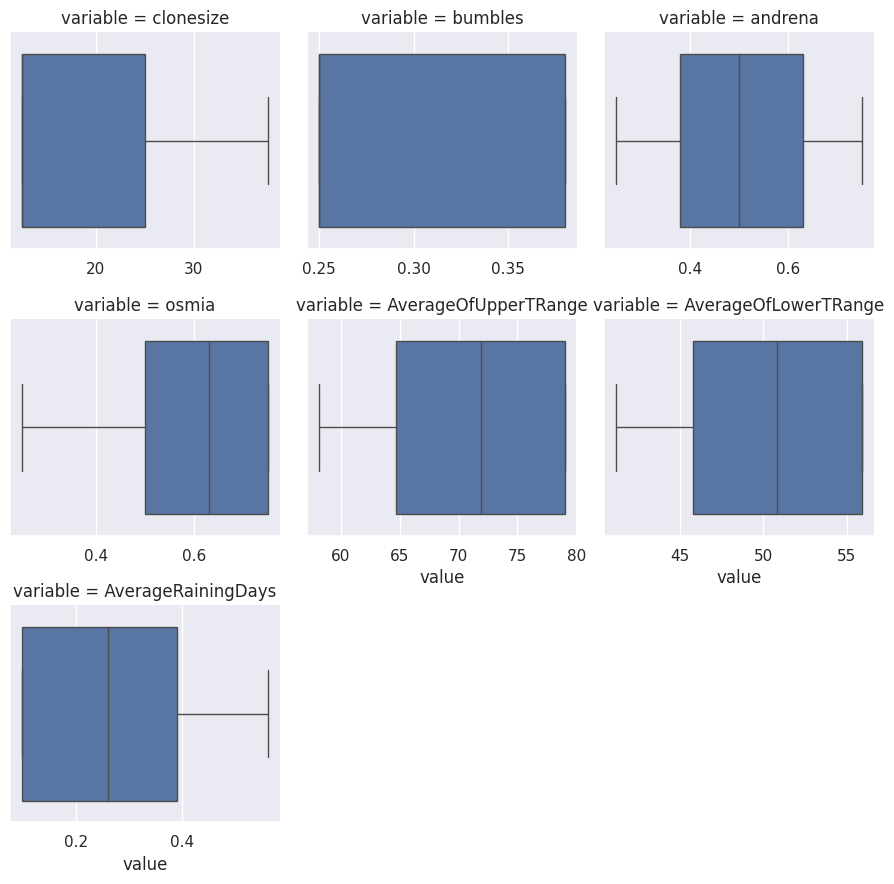

In [ ]:
unpivot = pd.melt(bbry_data_iqr, bbry_data_iqr.describe().columns[-1], bbry_data_iqr.describe().columns[:-1])

g = sns.FacetGrid(unpivot, col="variable", col_wrap=3, sharex=False, sharey=False)
g.map(sns.boxplot, "value")

plt.show()

In [ ]:
#splitting into independent and dependent features
X = bbry_data_iqr.drop(columns=['yield'])
y = bbry_data_iqr[['yield']]

In [ ]:
#splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state=0)

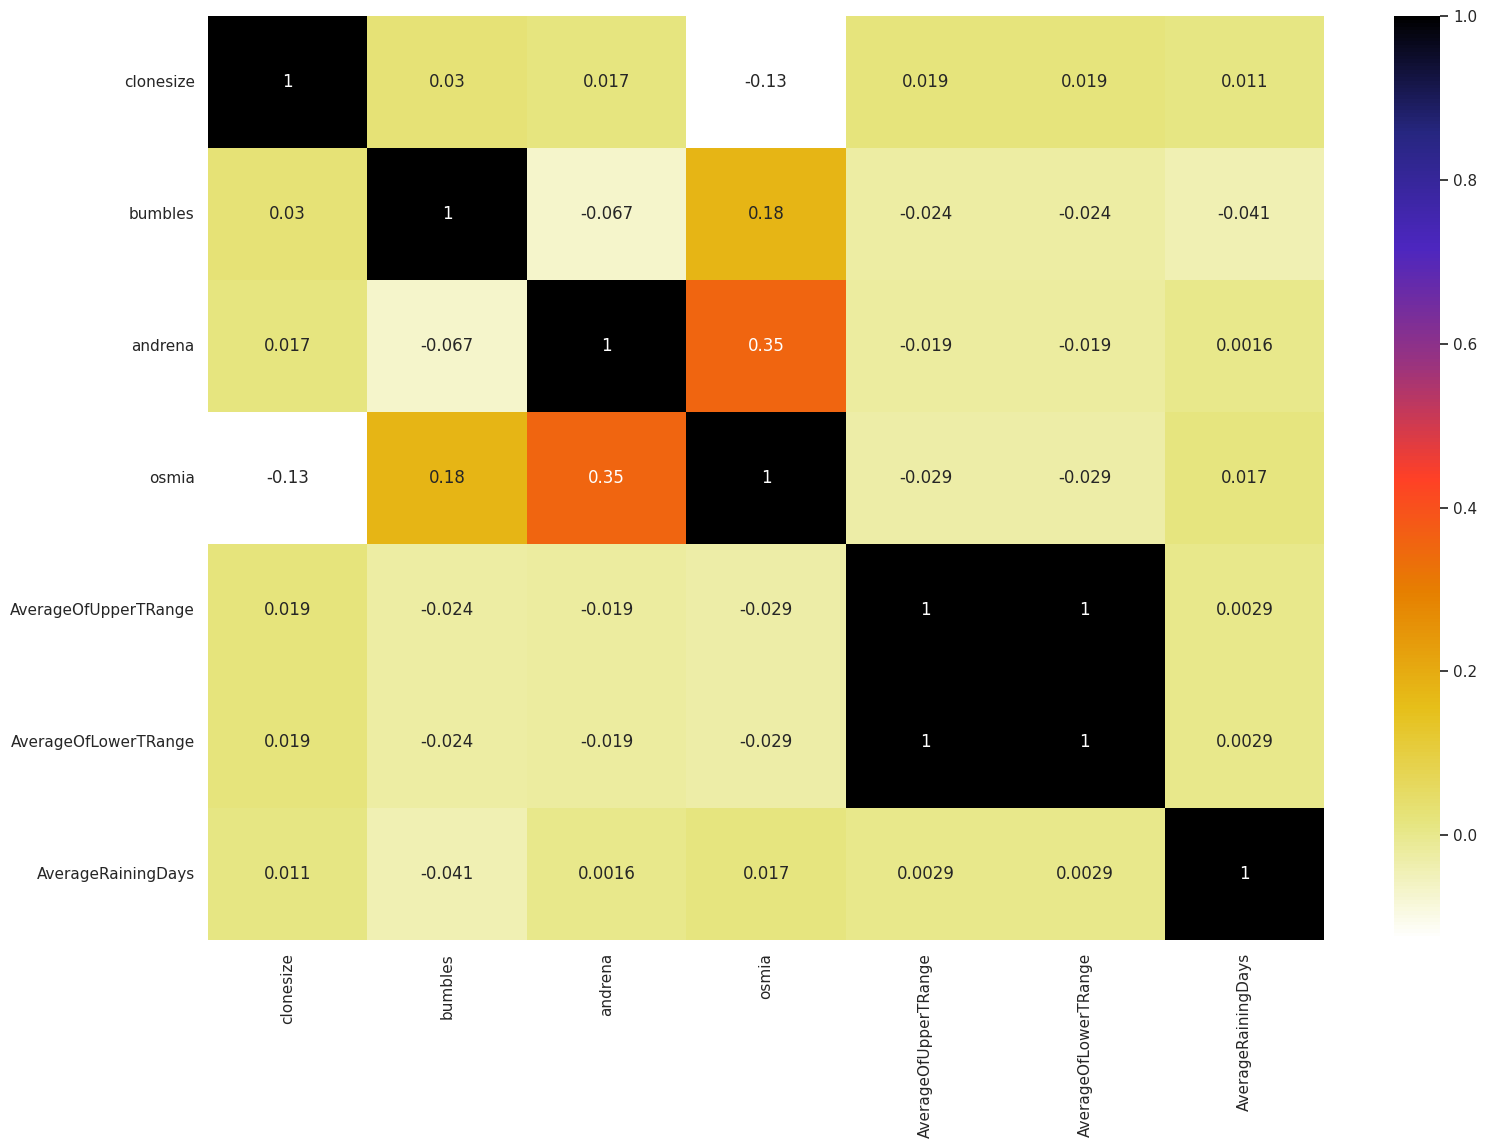

In [ ]:
# Using Pearson Correlation
plt.figure(figsize=(18,12))
cor=X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
#With this function, we can select highly correlated features
#The first feature that is correlated with any other feature will be removed

def correlation(dataset, threshold):
    col_corr = set()  #Set of all the names of Correlated Columns
    corr_matrix = dataset.corr()
    for i in range (len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]  #getting the name of the column
                col_corr.add(colname)
    return col_corr

In [ ]:

corr_features = correlation(X_train, 0.7)
len(set(corr_features))

1

# <span style="font-family:cursive;text-align:center">🧰 Modelling</span>

In [ ]:
X_train= X_train.drop(corr_features,axis=1)
X_test= X_test.drop(corr_features,axis=1)

In [ ]:
corr_features = {'AverageOfLowerTRange',
 'AverageOfUpperTRange',
 'AverageRainingDays',
 'MaxOfLowerTRange',
 'MinOfLowerTRange',
 'MinOfUpperTRange',
 'honeybee'}
corr_features

{'AverageOfLowerTRange',
 'AverageOfUpperTRange',
 'AverageRainingDays',
 'MaxOfLowerTRange',
 'MinOfLowerTRange',
 'MinOfUpperTRange',
 'honeybee'}

In [ ]:

X_train.shape

(606, 6)

In [ ]:
X_test.shape

(152, 6)

# <span style="font-family:cursive;text-align:center">🔘 Feature Selection</span>

Feature 0: 0.165306
Feature 1: 0.066358
Feature 2: 0.006806
Feature 3: 0.107018
Feature 4: 0.094501
Feature 5: 0.245807


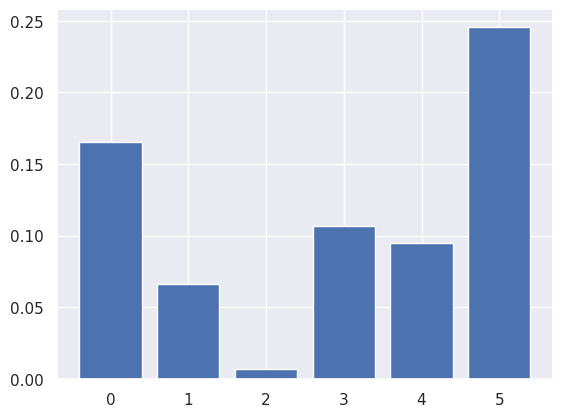

In [ ]:
# Mutual Information feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

# feature selection
def select_features_info_based(X_train, y_train, X_test):
	mutual_info = SelectKBest(score_func=mutual_info_regression, k='all')
	# learn relationship from training data
	mutual_info.fit(X_train, y_train)
	# transform train input data
	X_train_fs = mutual_info.transform(X_train)
	# transform test input data
	X_test_fs = mutual_info.transform(X_test)
	return X_train_fs, X_test_fs, mutual_info


# Feature Selection
X_train_fs, X_test_fs, fs_info = select_features_info_based(X_train, y_train, X_test)
fs_info
# what are scores for the features
for i in range(len(fs_info.scores_)):
	print('Feature %d: %f' % (i, fs_info.scores_[i]))
# plotting the scores
plt.bar([i for i in range(len(fs_info.scores_))], fs_info.scores_)
plt.show()

Feature 0: 222.369630
Feature 1: 59.978448
Feature 2: 8.006512
Feature 3: 83.667242
Feature 4: 18.973167
Feature 5: 367.387016


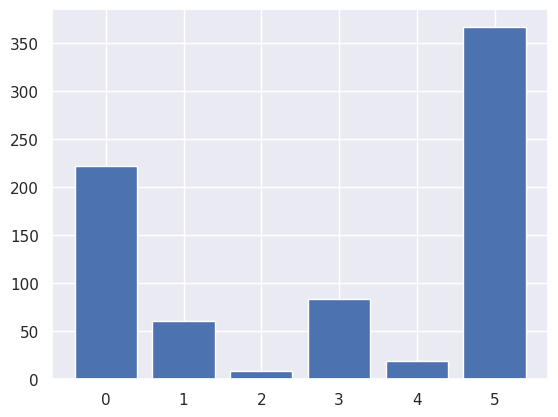

In [ ]:
# Correlation feature selection

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# Feature Selection
def select_features_corr_based(X_train, y_train, X_test):
	fs = SelectKBest(score_func=f_regression, k='all')
	# learning relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

# feature selection
X_train_fs, X_test_fs, fs_corr = select_features_corr_based(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs_corr.scores_)):
	print('Feature %d: %f' % (i, fs_corr.scores_[i]))
# plotting the scores
plt.bar([i for i in range(len(fs_corr.scores_))], fs_corr.scores_)
plt.show()

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
We will now train the model on top 7 features, using both the splits of dataset, <br>and check the metrics of the same on  4 Models:

* Linear Regression
* Random Forest
* Decision Tree
* XGBoost



In [ ]:
X_train_fs_model, X_test_fs_model, fs_info = select_features_info_based(X_train, y_train, X_test)

In [ ]:

X_train_fs_model.shape

(606, 6)

In [ ]:
X_test_fs_model.shape

(152, 6)

### <span style="font-family:cursive;text-align:center">LinearRegression</span>

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train_fs_model, y_train)
pred_linear = reg.predict(X_test_fs_model)


In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mae_linear = mean_absolute_error(y_test, pred_linear)
mse_linear = mean_squared_error(y_test, pred_linear)
rmse_linear = np.sqrt(mse_linear)
rsq_linear = r2_score(y_test, pred_linear)

print('MAE: %.3f' % mae_linear)
print('MSE: %.3f' % mse_linear)
print('RMSE: %.3f' % rmse_linear)
print('R-Square: %.3f' % rsq_linear)

MAE: 471.604
MSE: 317476.319
RMSE: 563.450
R-Square: 0.797


### <span style="font-family:cursive;text-align:center">RandomForest Regression</span>

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Defining the model and stating the random state to 1
rf_model = RandomForestRegressor(random_state=1)

# fitting the model
rf_model.fit(X_train_fs_model, y_train)
pred_rf=rf_model.predict(X_test_fs_model)
pred_rf=pred_rf.reshape(152,1)

mae_rf = mean_absolute_error(y_test, pred_rf)
mse_rf = mean_squared_error(y_test, pred_rf)
rmse_rf = np.sqrt(mse_rf)
rsq_rf = r2_score(y_test, pred_rf)

print('MAE: %.3f' % mae_rf)
print('MSE: %.3f' % mse_rf)
print('RMSE: %.3f' % rmse_rf)
print('R-Square: %.3f' % rsq_rf)

MAE: 202.623
MSE: 62370.190
RMSE: 249.740
R-Square: 0.960


### <span style="font-family:cursive;text-align:center">Decision Tree Regression</span>

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dtree_reg = DecisionTreeRegressor()
dtree_reg.fit(X_train_fs_model, y_train)
pred_dtree = dtree_reg.predict(X_test_fs_model)

mae_dtree = mean_absolute_error(y_test, pred_dtree)
mse_dtree = mean_squared_error(y_test, pred_dtree)
rmse_dtree = np.sqrt(mse_dtree)
rsq_dtree = r2_score(y_test, pred_dtree)

print('MAE: %.3f' % mae_dtree)
print('MSE: %.3f' % mse_dtree)
print('RMSE: %.3f' % rmse_dtree)
print('R-Square: %.3f' % rsq_dtree)

MAE: 240.145
MSE: 95046.859
RMSE: 308.297
R-Square: 0.939


### <span style="font-family:cursive;text-align:center">XGBRegression</span>

In [ ]:
import xgboost
from xgboost import XGBRegressor

xgb_model = XGBRegressor()
xgb_model.fit(X_train_fs_model, y_train)
pred_xgb = xgb_model.predict(X_test_fs_model)

mae_xgb = mean_absolute_error(y_test, pred_xgb)
mse_xgb = mean_squared_error(y_test, pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
rsq_xgb = r2_score(y_test, pred_xgb)

print('MAE: %.3f' % mae_xgb)
print('MSE: %.3f' % mse_xgb)
print('RMSE: %.3f' % rmse_xgb)
print('R-Square: %.3f' % rsq_xgb)

MAE: 178.602
MSE: 53180.168
RMSE: 230.608
R-Square: 0.966


# <span style="font-family:cursive;text-align:center">Model Evaluation</span>

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">

We can also check the R<sup>2</sup> score. Here, we will be aiming to reduce the <b>RMSE</b> and <b> MAE </b> values.
The comparative BarPlot shows the values of each.

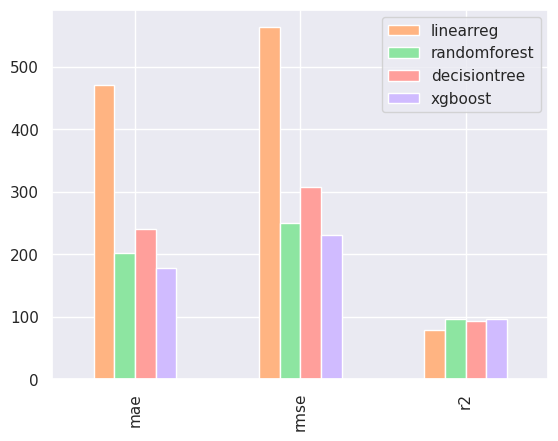

In [ ]:
error_rec = {
    "linearreg": {
        "mae": mae_linear,
        "rmse": rmse_linear,
        'r2': rsq_linear*100
    },
    "randomforest": {
        "mae": mae_rf,
        "rmse": rmse_rf,
        'r2': rsq_rf*100
    },
    "decisiontree": {
        "mae": mae_dtree,
        "rmse": rmse_dtree,
        'r2': rsq_dtree*100
    },
    "xgboost": {
        "mae": mae_xgb,
        "rmse": rmse_xgb,
        'r2': rsq_xgb*100
    },
}
pd.DataFrame(error_rec).plot(kind="bar",
             color=[
                 sns.color_palette("pastel")[1],
                 sns.color_palette("pastel")[2],
                 sns.color_palette("pastel")[3],
                 sns.color_palette("pastel")[4]]);

# <span style="font-family:cursive;text-align:center">Hyperparameter Tuning</span>

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
crossvalidation, RepeatedKFold and GridSearchCV are the popular methods for Parameter Tuning. We have only tuned the model for K values, plus an addition model parameter. With greater processor, the tuning can afford to produce folds 3 times over 4 parameter values.
    
>Another alternative is:
> <b> TuneSearchCV </b>

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


cv = RepeatedKFold(n_splits= 78,n_repeats = 3,random_state = 1)
fs_info_v0 = SelectKBest(score_func = mutual_info_regression)

# define pipeline for each algorithm
# define GSCV for each
# loop through it


pipe_lr = Pipeline([
    ('sel', fs_info_v0),
    ('model', LinearRegression())
])

pipe_rf = Pipeline([
    ('sel', fs_info_v0),
    ('model', RandomForestRegressor(random_state=1))
])

pipe_dtree = Pipeline([
    ('sel', fs_info_v0),
    ('model', DecisionTreeRegressor(random_state=1))
])

pipe_xgb = Pipeline([
    ('sel', fs_info_v0),
    ('model', XGBRegressor(random_state=1))
])

In [ ]:
param_range = [15, 18, 10]
param_range_fl = [5.0, 10.0]

grid_params_lr = [{'sel__k': [i for i in range(X_train_fs_model.shape[1]-6, X_train_fs_model.shape[1]-4)],
        }]


grid_params_rf = [{'sel__k': [i for i in range(X_train_fs_model.shape[1]-6, X_train_fs_model.shape[1]-4)],
        'model__criterion': ['squared_error', 'absolute_error'],
#         'model__max_depth': param_range,
#         'model__min_samples_split': param_range[1:]
                  }]


grid_params_dtree = [{'sel__k': [i for i in range(X_train_fs_model.shape[1]-6, X_train_fs_model.shape[1]-4)],
                    'model__criterion': ['squared_error', 'absolute_error'],
#                      'model__max_depth': param_range,
#                      'model__max_features': ['auto', 'sqrt']
                     }]


grid_params_xgb = [{'sel__k': [i for i in range(X_train_fs_model.shape[1]-6, X_train_fs_model.shape[1]-4)],
#                     'model__max_depth': [9,12],
#                    'model__min_child_weight': [7,8],
                   'model__subsample': [i/10. for i in range(9,11)]
                   }]

LR = GridSearchCV(estimator=pipe_lr,
            param_grid=grid_params_lr,
            scoring='neg_mean_absolute_error',
            cv=cv)

RF = GridSearchCV(estimator=pipe_rf,
            param_grid=grid_params_rf,
            scoring='neg_mean_absolute_error',
            cv=cv,
            n_jobs= -1)

DT = GridSearchCV(estimator=pipe_dtree,
            param_grid=grid_params_dtree,
            scoring='neg_mean_absolute_error',
            cv=cv,
            n_jobs= -1)

XGB = GridSearchCV(estimator=pipe_xgb,
            param_grid=grid_params_xgb,
            scoring='neg_mean_absolute_error',
            cv=cv,
            n_jobs= -1)

grids = [LR,RF,XGB,DT]

# Creating a dict for our reference
grid_dict = {0: 'Logistic Regression',
        1: 'Random Forest',
        2: 'XGBoost',
        3: 'Decision Tree'}

In [ ]:
def extract_best_model(grids: list, grid_dict: dict):
    print('Performing model optimizations...')
    least_mae = 270817
    best_regr = 0
    best_gs = ''
    for idx, gs in enumerate(grids):
        print('\nEstimator: %s' % grid_dict[idx])
        gs.fit(X_train_fs_model, y_train.values.ravel())
        print('Best Config: %s' % gs.best_params_)
        # Best training data accuracy
        print('Best MAE: %.3f' % gs.best_score_)
        # Predict on test data with best params
        y_pred_v0 = gs.predict(X_test_fs_model)
        # Test data accuracy of model with best params
        print('Test set mean absolute error for best params: %.3f ' % mean_absolute_error(y_test, y_pred_v0))
        print('Test set root mean squared error for best params: %.3f ' % np.sqrt(mean_absolute_error(y_test, y_pred_v0)))

        # Track best (least test error) model
        if mean_absolute_error(y_test, y_pred_v0) < least_mae:
            least_mae = mean_absolute_error(y_test, y_pred_v0)
            best_gs = gs
            best_regr = idx
    print('\nClassifier with least test set MAE: %s' % grid_dict[best_regr])

    ## Save best grid search pipeline to file
    # dump_file = 'best_grid_search_pipeline.pkl'
    # joblib.dump(best_gs, dump_file, compress=1)
    # print('\nSaved %s grid search pipeline to file: %s' % (grid_dict[best_regr], dump_file))

    ########### summarize all values of parameters (uncomment only if nescessary)
    ######### means = results.cv_results_['mean_test_score']
    ######## params = results.cv_results_['params']
    ####### for mean, param in zip(means, params):
    ###### print(">%.3f with: %r" % (mean, param))

    return (grid_dict[best_regr], best_gs, least_mae)

# <span style="font-family:cursive;text-align:center">Prediction and Evaluation</span>

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    
**Running the GridSearchCV and saving the best model.**

In [ ]:
best_model_name_v0, best_model_v0, least_mae_v0 = extract_best_model(grids= grids, grid_dict = grid_dict)

print(f"Best Model: {best_model_name_v0}")
print(f"Error Rate: {least_mae_v0}")
print(best_model_v0)

Performing model optimizations...

Estimator: Logistic Regression
Best Config: {'sel__k': 1}
Best MAE: -859.837
Test set mean absolute error for best params: 837.560 
Test set root mean squared error for best params: 28.941 

Estimator: Random Forest
Best Config: {'model__criterion': 'squared_error', 'sel__k': 1}
Best MAE: -855.724
Test set mean absolute error for best params: 838.203 
Test set root mean squared error for best params: 28.952 

Estimator: XGBoost
Best Config: {'model__subsample': 1.0, 'sel__k': 1}
Best MAE: -855.806
Test set mean absolute error for best params: 837.957 
Test set root mean squared error for best params: 28.947 

Estimator: Decision Tree
Best Config: {'model__criterion': 'squared_error', 'sel__k': 1}
Best MAE: -855.806
Test set mean absolute error for best params: 837.957 
Test set root mean squared error for best params: 28.947 

Classifier with least test set MAE: Logistic Regression
Best Model: Logistic Regression
Error Rate: 837.5604326291353
GridSear

In [ ]:
grid_params_rf1 = [{
    'model__max_depth': [15, 18, 10],
    'model__min_samples_split': [2,5],
    'model__criterion': ['squared_error']
}]

RF1 = GridSearchCV(
    estimator = Pipeline([
                    ('sel', SelectKBest(score_func=mutual_info_regression, k=6)),
                    ('model', RandomForestRegressor(random_state=1, criterion='mse'))
                ]),
            param_grid=grid_params_rf1,
            scoring='neg_mean_absolute_error',
            cv=cv,
            n_jobs= -1)


print("Random Forest V-1 optimising...")
RF1.fit(X_train_fs_model, y_train)
print('Best Config: %s' % RF1.best_params_)
print('Best MAE: %.3f' % RF1.best_score_)
y_pred_v1_rf1 = RF1.predict(X_test_fs_model)
print('Test set mean absolute error for best params: %.3f ' % mean_absolute_error(y_test, y_pred_v1_rf1))
print('Test set root mean squared error for best params: %.3f ' % np.sqrt(mean_absolute_error(y_test, y_pred_v1_rf1)))

Random Forest V-1 optimising...
Best Config: {'model__criterion': 'squared_error', 'model__max_depth': 15, 'model__min_samples_split': 2}
Best MAE: -175.562
Test set mean absolute error for best params: 202.623 
Test set root mean squared error for best params: 14.235 
